In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Datasets/Salary_Data_3.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.duplicated().sum()

4912

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isna().sum()

Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1791 non-null   float64
 1   Gender               1791 non-null   object 
 2   Education Level      1790 non-null   object 
 3   Job Title            1791 non-null   object 
 4   Years of Experience  1790 non-null   float64
 5   Salary               1788 non-null   float64
dtypes: float64(3), object(3)
memory usage: 98.0+ KB


In [8]:
cat_columns = df.select_dtypes(include='object').columns
num_columns = df.select_dtypes(exclude='object').columns

df[num_columns] = df[num_columns].fillna(df[num_columns].mean())
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])

In [9]:
# encoding / standardizing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

df[['Gender','Job Title','Education Level']] = OrdinalEncoder().fit_transform(df[['Gender','Job Title','Education Level']])
df[num_columns] = StandardScaler().fit_transform(df[num_columns])

In [10]:
X = df.drop('Salary', axis=1)
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_y = lr.predict(X_test)

print(f'{mean_squared_error(y_test, pred_y)}')


0.2784573096192699


In [12]:
lr.coef_

array([-1.60224474e-02,  9.22751984e-02,  9.63769966e-02, -4.90409022e-04,
        7.56685058e-01])

In [13]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential(
    [
        Dense(
            units = 8,
            activation = 'relu'),
        Dense(
            units = 8,
            activation = 'relu'),
        Dense(
            units = 1,
            activation = 'relu'),
    ]
)

In [14]:
model.compile(metrics=['mae'],loss=['mse'])

In [15]:
history = model.fit(X_train, y_train,epochs=50,validation_split=0.2)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 312.0186 - mae: 14.4260 - val_loss: 25.8901 - val_mae: 4.3846
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.8911 - mae: 2.6564 - val_loss: 0.8447 - val_mae: 0.7817
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7726 - mae: 0.7473 - val_loss: 0.7487 - val_mae: 0.7067
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7537 - mae: 0.7174 - val_loss: 1.0113 - val_mae: 0.8637
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8254 - mae: 0.7578 - val_loss: 1.0040 - val_mae: 0.8587
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8067 - mae: 0.7532 - val_loss: 0.7677 - val_mae: 0.7303
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7495 - mae: 0.7176 - val_loss: 0.7348 - val_mae: 0.7064
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7921 - mae: 0.7395 - val_loss: 0.8243 - val_mae: 0.7685
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8230 - 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260 (1.02 KB)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 131 (528.00 B)

<Axes: >

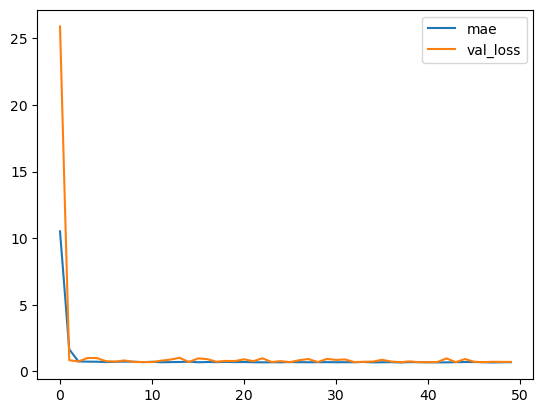

In [24]:
pd.DataFrame(history.history)[['mae','val_loss']].plot()